Processamento de Linguagem Natural com Python

Importação das Bibliotecas

In [ ]:
!python3 -m spacy download pt

In [ ]:
!pip install bs4

In [ ]:
import bs4 as bs
import urllib.request
import nltk
import spacy

Marcação POS
- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que texto contém
- List de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [ ]:
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

In [ ]:
type(documento)

In [ ]:
for token in documento:
    print(token.text, token.pos_)

Lematização e Stemização

In [ ]:
for token in documento:
    print(token.text, token.lemma_)

In [ ]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

In [ ]:
import nltk
nltk.download('rslp')

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

In [ ]:
for token in documento:
    print(token.text, token.lemma, stemmer.stem(token.text))

Carregamento dos textos

In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [ ]:
dados = dados.read()
dados

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'html')
dados_html

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

In [ ]:
paragrafos[1].text

In [ ]:
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [ ]:
conteudo

In [ ]:
conteudo = conteudo.lower()
conteudo

Buscas em Texto com spaCy

In [ ]:
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
string = 'turing'
token_pesquisa = pln(string)

In [ ]:
pln.vocab

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

In [ ]:
doc[3196:3197], doc[3196-5:3197+5]

In [ ]:
doc[8613:8614], doc[8613-5:8614+5]

In [ ]:
matches[0], matches[0][1], matches[0][2]

In [ ]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
    texto += "<br /><br />"
display(HTML(f"""...{texto}..."""))

Extração de Entidades nomeadas
- NER(Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento(pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falando
- siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

Nuvem de palavras e stop words

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

In [ ]:
len(STOP_WORDS)

In [ ]:
pln.vocab['usa'].is_stop

In [ ]:
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)


In [ ]:
print(lista_token)

In [ ]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [ ]:
len(lista_token)

In [ ]:
len(sem_stop)

In [ ]:
print(sem_stop)

In [ ]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap= color_map)

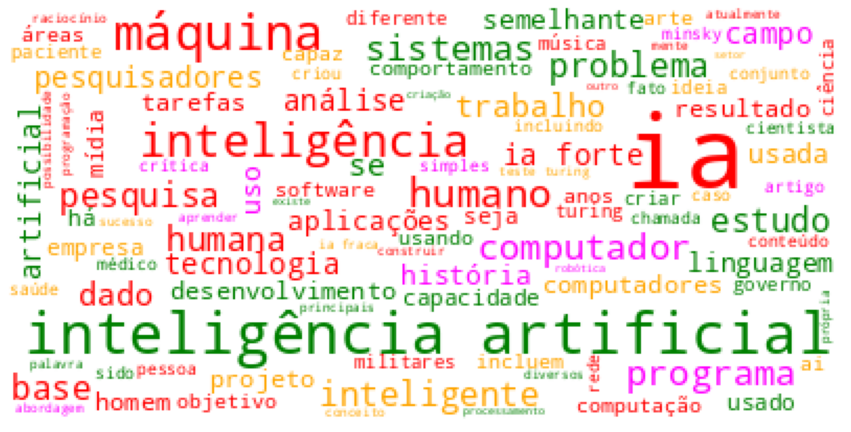

In [147]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()